In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from uuid import uuid4 as ID
import inspect
warnings.filterwarnings('ignore')
import cognitive_functions as cf
import primitive_fucntions as pf
from utils import Stopwatch, Element, pretty_view
from collections import defaultdict
import random


In [2]:
obj1 = Element("1","yellow", "square")
obj2 = Element("2","blue", "square")
obj3 = Element("3","yellow", "circle")
obj4 = Element("4","blue", "circle")


In [3]:
set1 = {1,2,3}
s = 3
# set1.remove(s)
# print(set1)

def rem(S,s):
    S.remove(s)

# rem(set1,s)
pf.setminus(set1,s)
print(set1)

{1, 2}


In [4]:
S = {obj1, obj2, obj3, obj4}
assoc = {obj1: obj2, obj3: obj4}
res = cf.palindrome(S)
print(res)

([<utils.Element object at 0x12904fbb0>, <utils.Element object at 0x129123620>, <utils.Element object at 0x10696b750>, <utils.Element object at 0x10696b610>], 0.00034708299790509045)


In [5]:
pretty_view(res[0])

+----------+---------------+---------------+
|   object | attribute 1   | attribute 2   |
+==========+===============+===============+
|        4 | blue          | circle        |
+----------+---------------+---------------+
|        1 | yellow        | square        |
+----------+---------------+---------------+
|        2 | blue          | square        |
+----------+---------------+---------------+
|        3 | yellow        | circle        |
+----------+---------------+---------------+


In [6]:
res

([<utils.Element at 0x12904fbb0>,
 0.00034708299790509045)

In [7]:
my_set = {1, 2, 3, 4, 5}
random_element = random.sample(tuple(my_set), 1)[0]

In [8]:
for _ in range(3):
    print(_)

0
1
2


In [9]:
class GeneratePatterns:

    def __init__(self):
        pass

    def chunk(self, attr1, attr2):
        


_IncompleteInputError: incomplete input (712557436.py, line 7)

In [ ]:
# attribute choices



In [ ]:
# given attribute choices, generate sequences

# 1-D

# 

In [ ]:
# 2-D

In [ ]:
perms = permutations(objs)

In [ ]:
for perm in perms:
    print([elem.id for elem in perm])

['b83bb1a9e3cb402381c58bb8dedf2a46', '2e38f3724b244751a146a87f36127f14', '360012e4df9947188b69bff096957e36', 'ff043a2009a547d0833bd562d3103ba6']
['b83bb1a9e3cb402381c58bb8dedf2a46', '2e38f3724b244751a146a87f36127f14', 'ff043a2009a547d0833bd562d3103ba6', '360012e4df9947188b69bff096957e36']
['b83bb1a9e3cb402381c58bb8dedf2a46', '360012e4df9947188b69bff096957e36', '2e38f3724b244751a146a87f36127f14', 'ff043a2009a547d0833bd562d3103ba6']
['b83bb1a9e3cb402381c58bb8dedf2a46', '360012e4df9947188b69bff096957e36', 'ff043a2009a547d0833bd562d3103ba6', '2e38f3724b244751a146a87f36127f14']
['b83bb1a9e3cb402381c58bb8dedf2a46', 'ff043a2009a547d0833bd562d3103ba6', '2e38f3724b244751a146a87f36127f14', '360012e4df9947188b69bff096957e36']
['b83bb1a9e3cb402381c58bb8dedf2a46', 'ff043a2009a547d0833bd562d3103ba6', '360012e4df9947188b69bff096957e36', '2e38f3724b244751a146a87f36127f14']
['2e38f3724b244751a146a87f36127f14', 'b83bb1a9e3cb402381c58bb8dedf2a46', '360012e4df9947188b69bff096957e36', 'ff043a2009a547d0833b

In [ ]:
obj5, obj6, obj7, obj8 = (NDElement(1, 'yellow'),
                          NDElement(1, 'yellow'),
                          NDElement(1, 'blue'),
                          NDElement(1, 'blue'))

In [ ]:
import itertools

def generate_permutations():
    # Define all the possible pairs (attributes)
    pairs = ['00', '01', '10', '11']
    
    # Store the valid permutations
    valid_permutations = []
    
    # Generate all permutations of the four pairs
    all_permutations = itertools.permutations(pairs)
    
    # Filter the permutations that match the desired pattern
    for perm in all_permutations:
        if {perm[0], perm[1]} == {'00', '01'} and {perm[2], perm[3]} == {'10', '11'}:
            valid_permutations.append(perm)
    
    return valid_permutations

# Call the function to generate the valid permutations
sequences = generate_permutations()

# Print the result
for seq in sequences:
    print(' '.join(seq))


00 01 10 11
00 01 11 10
01 00 10 11
01 00 11 10


### Primitive functions

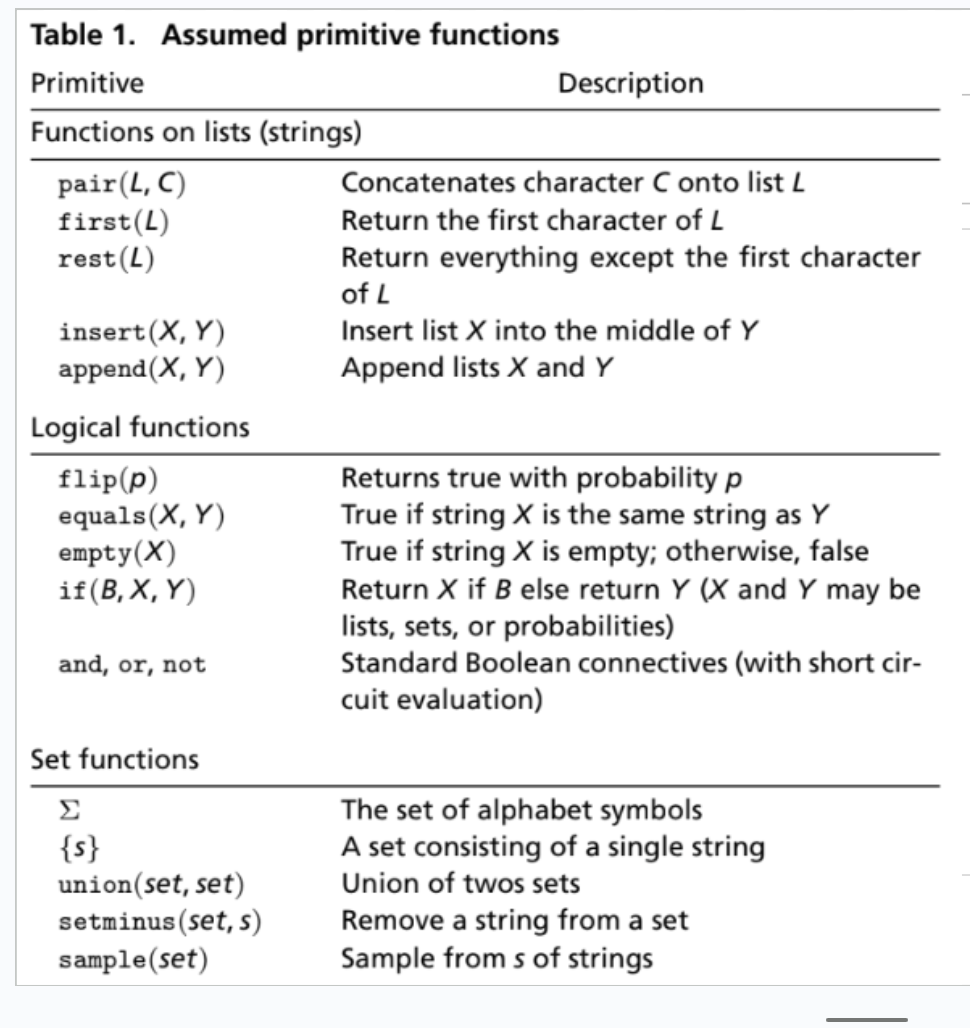

In [ ]:
import random

# Define primitive functions

## Funtions on lists

def pair(L:list, C):
    return (L.append(C))

def first(L:list):
    return L[0]

def rest(L:list):
    return L[1:]

def insert(X:list, Y:list): # cannot be done in O(1)!
    mid_index = len(Y) // 2
    Y[mid_index:mid_index] = X
    return Y

def append(X:list, Y:list):
    return (X.extend(Y))
    

## Logical functions

def flip(p):
    return random.random() < p

def equals(X, Y)

def empty(L:list):
    return (not L)

## Set functions

In [ ]:
import random

def serial_crossed_cognitive_function(objects):
    # Extract unique values of each attribute
    first_attributes = list(set(obj[0] for obj in objects))
    second_attributes = list(set(obj[1] for obj in objects))

    # Determine if clumping is allowed based on the number of choices
    can_clump_first = len(first_attributes) == 2
    can_clump_second = len(second_attributes) == 2
    
    # Randomly decide whether to clump by the first or second attribute, if possible
    clump_by_first = random.choice([True, False]) if can_clump_first and can_clump_second else can_clump_first

    # Generate the valid pairs that exist in the original objects
    valid_pairs = set(objects)

    # Start with the base attributes and generate pairs in a crossed manner
    ordered_objects = []
    
    if clump_by_first:
        for f_attr in first_attributes:
            for s_attr in second_attributes:
                if (f_attr, s_attr) in valid_pairs:
                    ordered_objects.append((f_attr, s_attr))
    else:
        for f_attr in second_attributes:
            for s_attr in first_attributes:
                if (f_attr, s_attr) in valid_pairs:
                    ordered_objects.append((f_attr, s_attr))

    # Shuffle the ordered sequence to add randomness
    random.shuffle(ordered_objects)

    return ordered_objects

# Example usage
objects = [('x', 'red'), ('y', 'blue'), ('x', 'blue'), ('y', 'red')]
print(serial_crossed_cognitive_function(objects))


[('x', 'blue'), ('y', 'red'), ('y', 'blue'), ('x', 'red')]
